# Steel industry energy consumption forecasting

_by Virginia Herrero_

## Data loading
Load the CSV file **steel-industry-data** as a pandas DataFrame.

In [1]:
# Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv("steel-industry-data.csv")
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


## Data cleaning
Clean and pre-process the dataset prior to conducting further analysis.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

* **Remove unnecessary columns**

The date column is not necessary for this analysis, as it is not a time series analysis. Therefore, it is removed from the dataset.

In [4]:
df = df.drop("date", axis = 1)

* **Rename columns**

Some column names have been renamed to enhance readability and improve comprehension of the dataset.

In [5]:
df.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [6]:
df = df.rename(columns = {"Usage_kWh" : "energy_usage_kWh",
                          "Lagging_Current_Reactive.Power_kVarh" : "lagging_current_kVarh",
                          "Leading_Current_Reactive_Power_kVarh" : "leading_current_kVarh",
                          "CO2(tCO2)" : "CO2_ppm",
                          "Lagging_Current_Power_Factor" : "lagging_current_power_factor",
                          "Leading_Current_Power_Factor" : "leading_current_power_factor",
                          "WeekStatus" : "week_status",
                          "Day_of_week" : "day_of_the_week",
                          "Load_Type" : "load_type"})

In [7]:
df.head()

,energy_usage_kWh,lagging_current_kVarh,leading_current_kVarh,CO2_ppm,lagging_current_power_factor,leading_current_power_factor,NSM,week_status,day_of_the_week,load_type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


* **Data types**

Check that all columns have the appropriate data types.

In [8]:
df.dtypes

energy_usage_kWh                float64
lagging_current_kVarh           float64
leading_current_kVarh           float64
CO2_ppm                         float64
lagging_current_power_factor    float64
leading_current_power_factor    float64
NSM                               int64
week_status                      object
day_of_the_week                  object
load_type                        object
dtype: object

* **Null values**

Identify and remove any missing values, zero values, or NaN values from the dataset as needed.

In [9]:
# Check the total of null values in each column
df.isna().sum()

energy_usage_kWh                0
lagging_current_kVarh           0
leading_current_kVarh           0
CO2_ppm                         0
lagging_current_power_factor    0
leading_current_power_factor    0
NSM                             0
week_status                     0
day_of_the_week                 0
load_type                       0
dtype: int64

There are no missing values in the dataset.

* **Duplicated values**

Verify if there are any duplicate entries in the dataset.

In [10]:
df.duplicated().sum()

np.int64(81)

In [11]:
# Show all duplicated values
df[df.duplicated()]

,energy_usage_kWh,lagging_current_kVarh,leading_current_kVarh,CO2_ppm,lagging_current_power_factor,leading_current_power_factor,NSM,week_status,day_of_the_week,load_type
1053,4.64,4.79,0.00,0.0,69.58,100.00,84600,Weekday,Thursday,Light_Load
1560,4.64,4.61,0.00,0.0,70.94,100.00,22500,Weekday,Wednesday,Light_Load
3189,5.94,4.97,0.00,0.0,76.69,100.00,19800,Weekend,Saturday,Light_Load
6157,4.64,5.83,0.00,0.0,62.27,100.00,12600,Weekday,Tuesday,Light_Load
8150,4.21,0.00,25.81,0.0,100.00,16.10,78300,Weekday,Monday,Medium_Load
...,...,...,...,...,...,...,...,...,...,...
31690,4.72,4.28,0.00,0.0,74.08,100.00,9900,Weekday,Tuesday,Light_Load
32236,3.67,0.00,16.34,0.0,100.00,21.91,69300,Weekend,Sunday,Light_Load
33142,4.00,3.64,0.00,0.0,73.96,100.00,20700,Weekday,Wednesday,Light_Load
34192,3.42,2.92,0.00,0.0,76.05,100.00,15300,Weekend,Sunday,Light_Load


In [12]:
# Drop all duplicated values
df = df.drop_duplicates()

Eighty-one duplicate entries were detected and removed from the dataset.

* **Outliers**

Check for outliers in the dataset by first examining its statistical summary. This will provide an initial overview of the data.

In [13]:
df.describe()

,energy_usage_kWh,lagging_current_kVarh,leading_current_kVarh,CO2_ppm,lagging_current_power_factor,leading_current_power_factor,NSM
count,34959.000000,34959.000000,34959.000000,34959.000000,34959.000000,34959.000000,34959.000000
mean,27.443111,13.056014,3.875959,0.011551,80.625036,84.350093,42781.343860
std,33.462669,16.319073,7.427964,0.016160,18.902835,30.467553,24923.195433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.420000,99.690000,21600.000000
50%,4.570000,5.000000,0.000000,0.000000,88.000000,100.000000,43200.000000
75%,51.300000,22.720000,2.090000,0.020000,99.040000,100.000000,64800.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


At first glance, it can be inferred that there are some outliers in the columns **energy_usage_kWh**, **lagging_current_kVarh**, and **leading_current_kVarh**. This conclusion is based on the observation that the maximum values exceed both the mean and the median, which can indicate the presence of outliers.

A more thorough evaluation of these outliers is necessary to identify them and assess the appropriate approach for handling them.

Outliers in these three columns or features will be identified using the Interquartile Range (IQR) method. Analyzing the distribution of the data will reveal values that fall outside the typical range, enabling the selection of an appropriate approach for handling these outliers.

**1. Outliers in the feature "energy_usage_kWh":**

Text(0.5, 0.98, 'Energy Usage Distribution')

<Figure size 640x480 with 0 Axes>

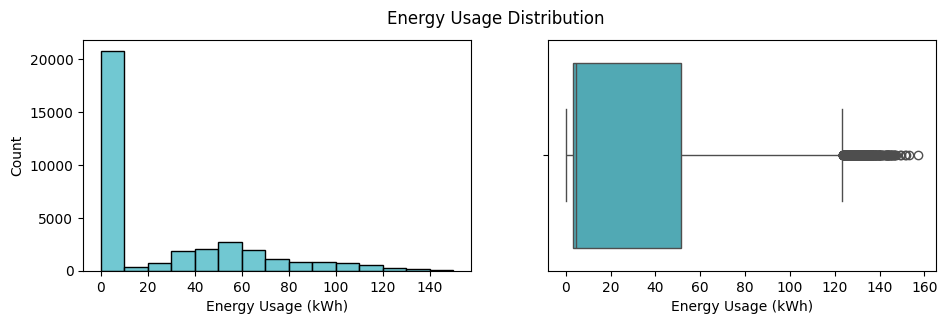

In [14]:
# Plot the energy usage distribution using a histogram and boxplot
energy_usage_distribution = plt.figure()
fig, ax = plt.subplots(1, 2, figsize = (11, 3))
sns.histplot(df["energy_usage_kWh"], ax = ax[0], bins = 15, binrange = (0, 150), color = "#41b6c4")
sns.boxplot(x = df["energy_usage_kWh"], ax = ax[1], color = "#41b6c4")
ax[0].set_xlabel("Energy Usage (kWh)")
ax[1].set_xlabel("Energy Usage (kWh)")
plt.suptitle("Energy Usage Distribution", size = 12)

A significant number of outliers have been identified through the boxplot of the feature "energy_usage_kWh." These outliers will be now quantified statistically.

In [15]:
# Create a function to find outliers using the IQR method

def find_outliers_iqr(dataframe, column):
    """
    Finds outliers in the specified column of a DataFrame using the IQR method

    Parameters
    ----------
    dataframe : Pandas DataFrame
        The DataFrame containing the data
    
    column : str
        The name of the column (as a string) in which to find the outliers

    Returns
    -------
    Pandas DataFrame
        A DataFrame containing the outliers identified in the specified column
   """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Determine the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
    print(f"The number of outliers in the column {column} is {outliers.shape[0]}")
    
    return outliers

In [16]:
outliers_energy_usage = find_outliers_iqr(df, "energy_usage_kWh")
outliers_energy_usage

The number of outliers in the column energy_usage_kWh is 322


,energy_usage_kWh,lagging_current_kVarh,leading_current_kVarh,CO2_ppm,lagging_current_power_factor,leading_current_power_factor,NSM,week_status,day_of_the_week,load_type
140,128.52,70.85,0.0,0.00,87.57,100.0,40500,Weekday,Tuesday,Maximum_Load
141,144.47,78.48,0.0,0.00,87.87,100.0,41400,Weekday,Tuesday,Maximum_Load
150,124.45,49.79,0.0,0.00,92.85,100.0,49500,Weekday,Tuesday,Medium_Load
153,129.10,53.50,0.0,0.00,92.38,100.0,52200,Weekday,Tuesday,Medium_Load
155,143.89,60.91,0.0,0.00,92.09,100.0,54000,Weekday,Tuesday,Medium_Load
...,...,...,...,...,...,...,...,...,...,...
33851,145.22,70.67,0.0,0.07,89.92,100.0,54000,Weekday,Wednesday,Medium_Load
33853,130.46,60.23,0.0,0.06,90.79,100.0,55800,Weekday,Wednesday,Medium_Load
33855,125.21,58.43,0.0,0.06,90.62,100.0,57600,Weekday,Wednesday,Medium_Load
33856,133.56,64.40,0.0,0.06,90.08,100.0,58500,Weekday,Wednesday,Medium_Load


The number of outliers is relatively low, so while they could simply be removed, I’ve decided to cap them instead. This approach allows me to retain the overall structure of the dataset while minimizing the impact of extreme values. 

In [17]:
def cap_outliers(dataframe, column):
    """
    Cap outliers in a specified column of the DataFrame using the IQR method

    Parameters
    ----------
    dataframe : Pandas DataFrame
        The DataFrame containing the data
    
    column : str
        The name of the column to cap outliers


    Returns
    -------
    Pandas DataFrame
        A DataFrame with outliers capped
    """
    if column not in dataframe.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")
    
    # Calculate Q1 and Q3
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)

    # Calculate IQR

    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    dataframe[column] = dataframe[column].clip(lower = lower_bound, upper = upper_bound)

    return dataframe

In [18]:
df = cap_outliers(df, "energy_usage_kWh")

**2. Outliers in the feature "lagging_current_kVarh":**

Text(0.5, 0.98, 'Lagging Current Distribution')

<Figure size 640x480 with 0 Axes>

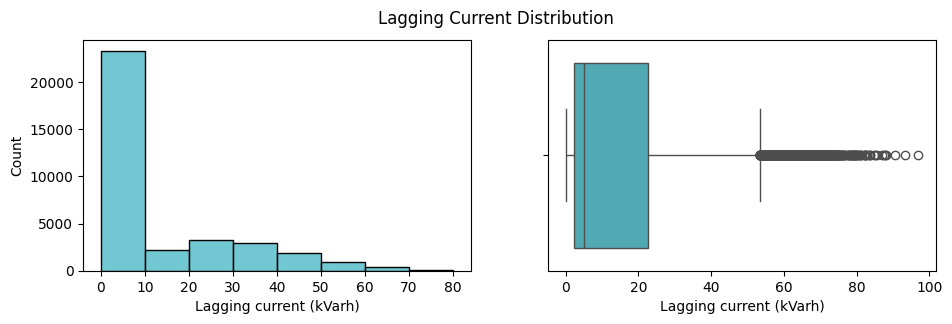

In [19]:
# Plot the lagging current distribution using a histogram and boxplot
lagging_current_distribution = plt.figure()
fig, ax = plt.subplots(1, 2, figsize = (11, 3))
sns.histplot(df["lagging_current_kVarh"], ax = ax[0], bins = 8, binrange = (0, 80), color = "#41b6c4")
sns.boxplot(x = df["lagging_current_kVarh"], ax = ax[1], color = "#41b6c4")
ax[0].set_xlabel("Lagging current (kVarh)")
ax[1].set_xlabel("Lagging current (kVarh)")
plt.suptitle("Lagging Current Distribution", size = 12)

In [20]:
outliers_lagging_current = find_outliers_iqr(df, "lagging_current_kVarh")
outliers_lagging_current

The number of outliers in the column lagging_current_kVarh is 1039


,energy_usage_kWh,lagging_current_kVarh,leading_current_kVarh,CO2_ppm,lagging_current_power_factor,leading_current_power_factor,NSM,week_status,day_of_the_week,load_type
140,123.45,70.85,0.0,0.00,87.57,100.0,40500,Weekday,Tuesday,Maximum_Load
141,123.45,78.48,0.0,0.00,87.87,100.0,41400,Weekday,Tuesday,Maximum_Load
142,90.86,54.29,0.0,0.00,85.84,100.0,42300,Weekday,Tuesday,Maximum_Load
143,123.30,66.06,0.0,0.00,88.15,100.0,43200,Weekday,Tuesday,Maximum_Load
152,123.12,55.26,0.0,0.00,91.23,100.0,51300,Weekday,Tuesday,Medium_Load
...,...,...,...,...,...,...,...,...,...,...
33853,123.45,60.23,0.0,0.06,90.79,100.0,55800,Weekday,Wednesday,Medium_Load
33855,123.45,58.43,0.0,0.06,90.62,100.0,57600,Weekday,Wednesday,Medium_Load
33856,123.45,64.40,0.0,0.06,90.08,100.0,58500,Weekday,Wednesday,Medium_Load
33921,79.85,60.98,0.0,0.04,79.48,100.0,30600,Weekday,Thursday,Light_Load


The feature "lagging_current_kVarh" has more outliers than the energy usage feature. These outliers will be addressed in a consistent manner, with capping applied at the upper limit determined by the IQR method.

In [21]:
df = cap_outliers(df, "lagging_current_kVarh")

**3. Outliers in the feature "leading_current_kVarh":**

Text(0.5, 0.98, 'Leading Current Distribution')

<Figure size 640x480 with 0 Axes>

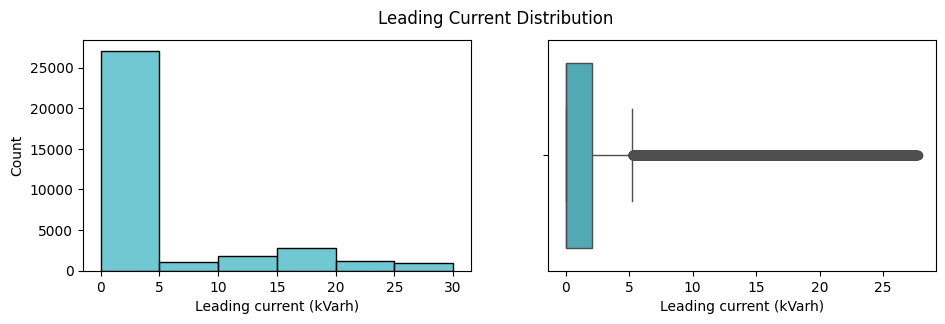

In [22]:
# Plot the lagging current distribution using a histogram and boxplot
leading_current_distribution = plt.figure()
fig, ax = plt.subplots(1, 2, figsize = (11, 3))
sns.histplot(df["leading_current_kVarh"], ax = ax[0], bins = 6, binrange = (0, 30), color = "#41b6c4")
sns.boxplot(x = df["leading_current_kVarh"], ax = ax[1], color = "#41b6c4")
ax[0].set_xlabel("Leading current (kVarh)")
ax[1].set_xlabel("Leading current (kVarh)")
plt.suptitle("Leading Current Distribution", size = 12)

In [23]:
outliers_leading_current = find_outliers_iqr(df, "leading_current_kVarh")
outliers_leading_current

The number of outliers in the column leading_current_kVarh is 7751


,energy_usage_kWh,lagging_current_kVarh,leading_current_kVarh,CO2_ppm,lagging_current_power_factor,leading_current_power_factor,NSM,week_status,day_of_the_week,load_type
35,3.89,0.0,15.66,0.0,100.0,24.11,32400,Weekday,Monday,Light_Load
36,3.60,0.0,16.96,0.0,100.0,20.76,33300,Weekday,Monday,Light_Load
37,4.03,0.0,21.28,0.0,100.0,18.61,34200,Weekday,Monday,Light_Load
38,3.92,0.0,19.22,0.0,100.0,19.98,35100,Weekday,Monday,Light_Load
39,3.64,0.0,16.88,0.0,100.0,21.08,36000,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...
35027,3.42,0.0,13.36,0.0,100.0,24.80,75600,Weekday,Monday,Light_Load
35028,3.42,0.0,13.39,0.0,100.0,24.75,76500,Weekday,Monday,Light_Load
35029,3.49,0.0,13.36,0.0,100.0,25.27,77400,Weekday,Monday,Light_Load
35030,3.42,0.0,13.36,0.0,100.0,24.80,78300,Weekday,Monday,Light_Load


The number of outliers in the feature "leading_current_kVahr" is significantly greater than in the other features. Nevertheless, the approach to handling these outliers will remain consistent.

In [24]:
df = cap_outliers(df, "leading_current_kVarh")

**The clean dataset:**

In [27]:
energy_consumption = df.copy()
energy_consumption.head()

,energy_usage_kWh,lagging_current_kVarh,leading_current_kVarh,CO2_ppm,lagging_current_power_factor,leading_current_power_factor,NSM,week_status,day_of_the_week,load_type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load
